In [372]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from matplotlib import pyplot as plt

In [373]:
propertyData_df1 = pd.read_csv("./datasets/CSTDAT10655_Output1_20220822.csv",encoding='latin1')
print(propertyData_df1.head())
print(propertyData_df1.shape)

/var/folders/qh/__j58r2568d6gfl4x7l64qwh0000gn/T/ipykernel_70130/1208614884.py:1: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  propertyData_df1 = pd.read_csv("./datasets/CSTDAT10655_Output1_20220822.csv",encoding='latin1')


   CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0   629180     3223584               0                 14    
1   629180     3992193               0                 14    
2   629181      844148               0                 16    
3   629187     6184761               0                 49    
4   629195     4627781               0                  9    

   CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

  CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction CL_Suburb  \
0           Ford                    St                      NaN   Opotiki   
1           Ford      

In [374]:
propertyData_df2 = pd.read_csv("./datasets/CSTDAT10655_Output2_20220822.csv",encoding='latin1')
print(propertyData_df2.head())
print(propertyData_df2.shape)

   CL_QPID   CL_Val_Ref  CL_Latitude  CL_Longitude  CL_Bedrooms  CL_Bathrooms
0  2416987   21851/2755   -43.477322    172.709781          4.0           1.0
1  2847968  28044/40700   -46.062788    170.194987          4.0           1.0
2  3299437    6622/6569          NaN           NaN          NaN           1.0
3   410286   4482/68000   -38.021743    175.324990          2.0           2.0
4  1652110  34643/12025   -37.014415    174.915014          NaN           1.0
(1635143, 6)


In [375]:
propertyData_df = propertyData_df1.merge(propertyData_df2,on="CL_QPID")
print(propertyData_df.shape)

(3225871, 61)


In [376]:
pd.set_option('display.max_columns', len(propertyData_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
print(propertyData_df.head(3))

   CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
0   629180     3223584               0                 14    
1   629180     3992193               0                 14    
2   629180      844145               0                 14    

   CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                                NaN   

  CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction CL_Suburb  \
0           Ford                    St                      NaN   Opotiki   
1           Ford                    St                      NaN   Opotiki   
2           Ford                    St                      NaN   Opotiki   

   CL_Town  CL_RegionID         CL_RegionName  CL_TAcode         CL_TAName  \
0  Opotiki            4  Bay of Plenty Region         27  Opoti

In [377]:
propertyData_df.CL_RegionName.unique()

array(['Bay of Plenty Region', 'Waikato Region',
       'Manawatu-Whanganui Region', 'Gisborne (Unitary)',
       'Northland Region', 'Auckland (Unitary)', 'Hawkes Bay Region',
       'Taranaki Region', 'Wellington Region',
       'Tasman Nelson Marlborough', 'West Coast Region',
       'Canterbury Region', 'Chathams', 'Otago Region',
       'Southland Region'], dtype=object)

In [378]:
AKL_df = propertyData_df[propertyData_df['CL_RegionName'] == 'Auckland (Unitary)']
print(AKL_df.head())
print(AKL_df.shape)

       CL_QPID  CL_Sale_ID  CL_Building_ID CL_Situation_Number  \
64588    75499     4334516               0                982    
64589    75639     2531689               0                 45    
64590    75639     3380545               0                 45    
64591    75639       80588               0                 45    
64592    75639     3194135               0                 45    

       CL_TA7_MissingMB_Situation_Number CL_TA7_MissingMB_Additional_Number  \
64588                                NaN                                NaN   
64589                                NaN                                NaN   
64590                                NaN                                NaN   
64591                                NaN                                NaN   
64592                                NaN                                NaN   

      CL_Street_Name CL_Street_Name_Suffix CL_Street_Name_Direction  \
64588      Mangawhai                    Rd               

In [379]:
AKL_df = AKL_df[AKL_df['CL_Sale_Date'] >'2018-01-01']
print(AKL_df.shape)

(124817, 61)


In [380]:
AKL_df.isnull().sum()

CL_QPID                                         0
CL_Sale_ID                                      0
CL_Building_ID                                  0
CL_Situation_Number                             0
CL_TA7_MissingMB_Situation_Number          121601
CL_TA7_MissingMB_Additional_Number         123168
CL_Street_Name                                  0
CL_Street_Name_Suffix                         777
CL_Street_Name_Direction                   123813
CL_Suburb                                    9074
CL_Town                                      6700
CL_RegionID                                     0
CL_RegionName                                   0
CL_TAcode                                       0
CL_TAName                                       0
CL_Meshblock                                18295
CL_SAU                                      18295
CL_Sale_Tenure                                  0
CL_Sale_Price_Value_Relationship                0
CL_Sale_Date                                    0


In [381]:
AKL_df = AKL_df.drop(['CL_MAS_Class_Surrounding_Improvmnt_Type', 'CL_MAS_Contour', 'CL_MAS_View',
        'CL_MAS_View_Scope', 'CL_MAS_Modernisation', 'CL_MAS_House_Type_Description',
        'CL_MAS_Deck_Indicator', 'CL_MAS_Driveway_Indicator', 'CL_MAS_Free_Standing_Garages',
        'CL_MAS_Estimated_Year_Built', 'CL_MAS_Landscaping_Quality', 'CL_MAS_Lot_Position','CL_TA7_MissingMB_Situation_Number',
        'CL_TA7_MissingMB_Additional_Number',
        'CL_Street_Name_Direction', 'CL_Sale_Price_Value_Relationship'], axis = 1)

<AxesSubplot:>

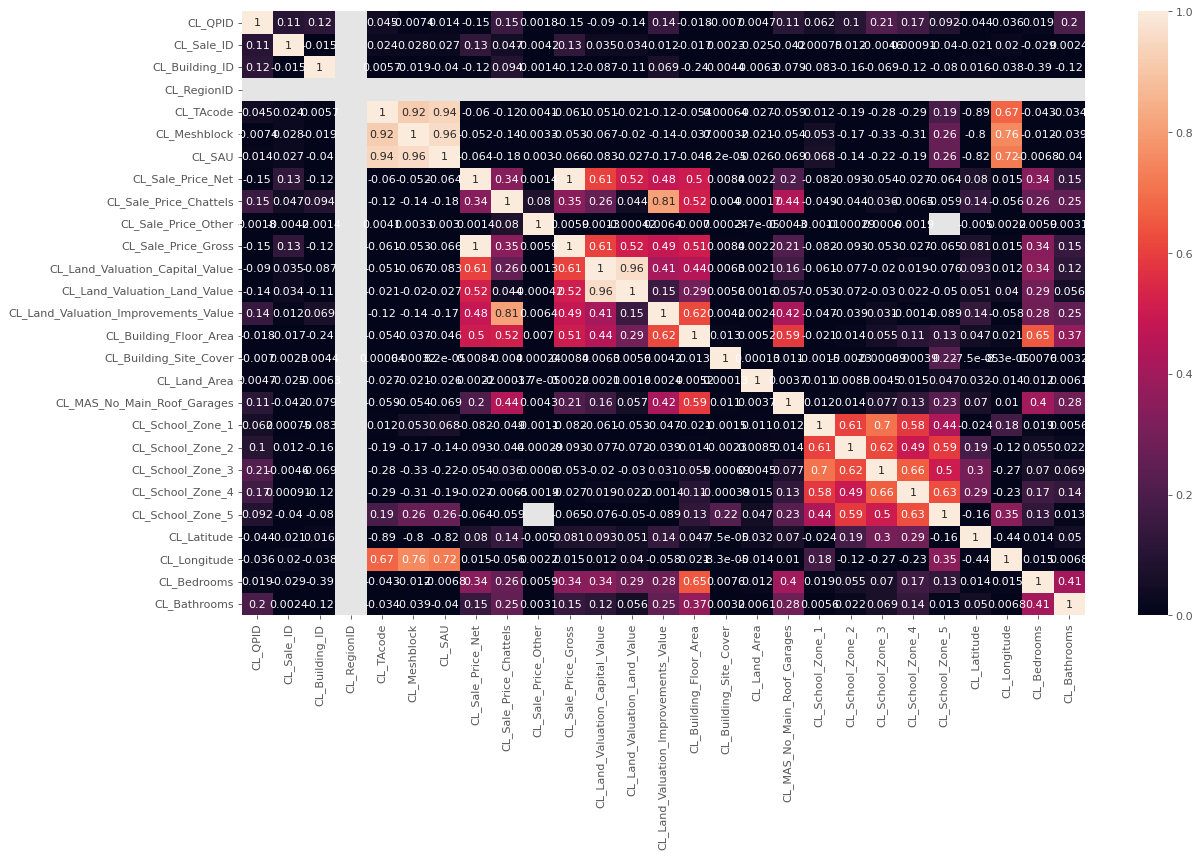

In [382]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [383]:
AKL_df = AKL_df.drop(['CL_Sale_ID', 'CL_Building_ID', 'CL_Situation_Number',
             'CL_Street_Name','CL_Street_Name_Suffix', 'CL_Town',
             'CL_RegionID','CL_RegionName', 'CL_TAcode', 'CL_TAName',
             'CL_Meshblock', 'CL_SAU', 'CL_Sale_Price_Chattels'], axis = 1)

<AxesSubplot:>

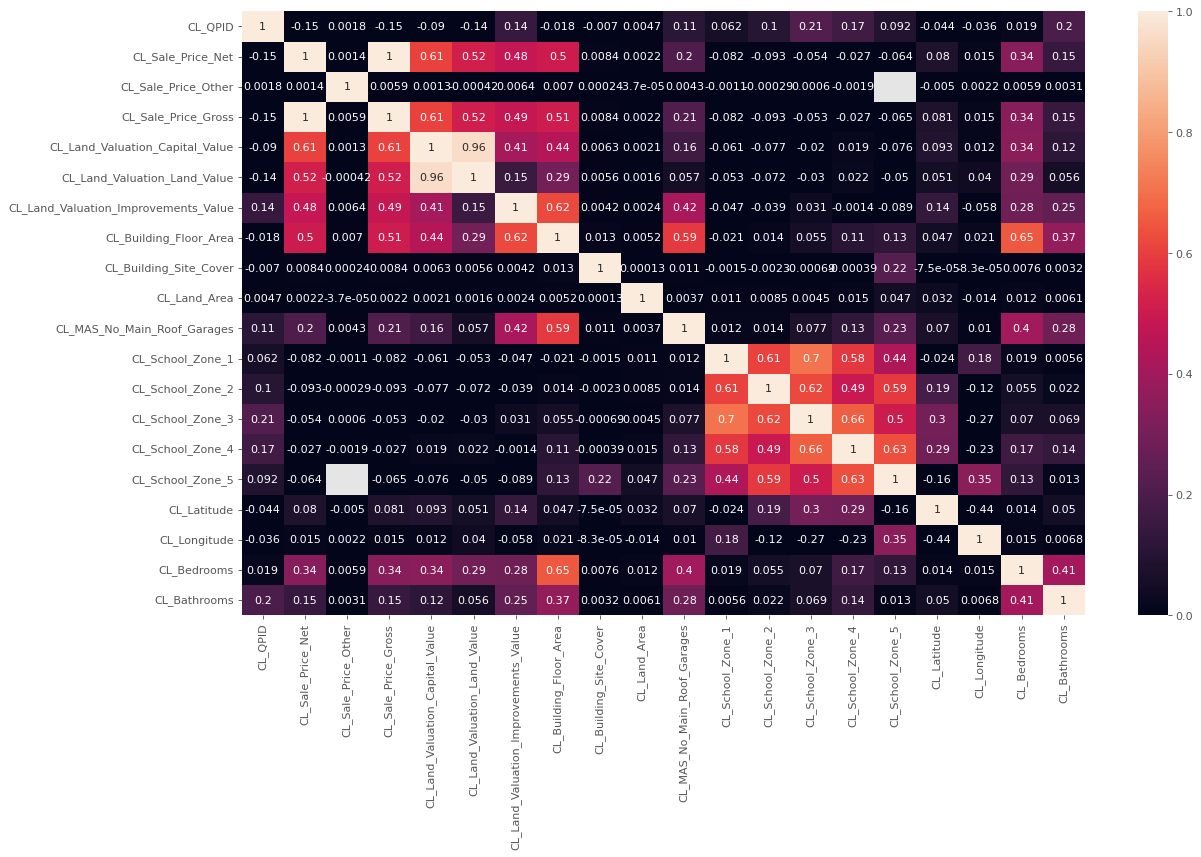

In [384]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [385]:
AKL_df = AKL_df.drop(['CL_Sale_Price_Other', 'CL_Sale_Price_Gross', 'CL_Land_Valuation_Land_Value', 'CL_Land_Valuation_Improvements_Value'], axis = 1)

In [386]:
zero_sale_price = AKL_df[AKL_df['CL_Sale_Price_Net'] == 0]
print(zero_sale_price.shape)

(0, 28)


In [387]:
AKL_df = AKL_df.drop(zero_sale_price.index)

In [388]:
AKL_df['Log_Sale_Price_Net'] = np.log(AKL_df['CL_Sale_Price_Net'])

In [389]:
zero_logged_sale_price = AKL_df[AKL_df['Log_Sale_Price_Net']== 0]
print(zero_logged_sale_price.shape)

(0, 29)


In [390]:
AKL_df = AKL_df.drop(zero_logged_sale_price.index)

<AxesSubplot:xlabel='CL_Building_Site_Cover', ylabel='Log_Sale_Price_Net'>

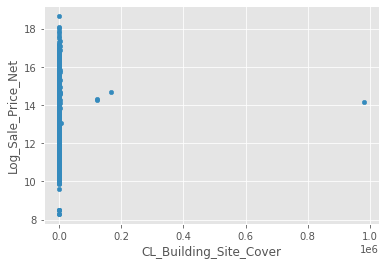

In [391]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Site_Cover']], axis=1)
data.plot.scatter(x='CL_Building_Site_Cover', y='Log_Sale_Price_Net')

In [392]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Site_Cover'] > 475].index)

<AxesSubplot:xlabel='CL_Building_Site_Cover', ylabel='Log_Sale_Price_Net'>

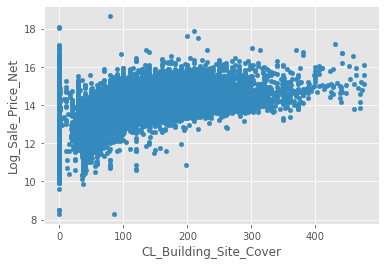

In [393]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Site_Cover']], axis=1)
data.plot.scatter(x='CL_Building_Site_Cover', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Land_Area', ylabel='Log_Sale_Price_Net'>

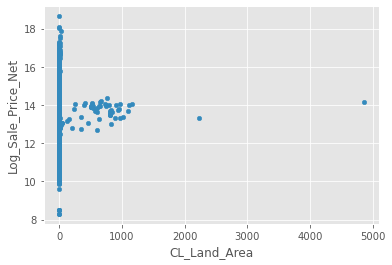

In [394]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Land_Area']], axis=1)
data.plot.scatter(x='CL_Land_Area', y='Log_Sale_Price_Net')

In [395]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Area'] > 1.25].index)

<AxesSubplot:xlabel='CL_Land_Area', ylabel='Log_Sale_Price_Net'>

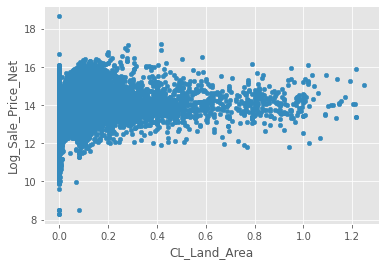

In [396]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Land_Area']], axis=1)
data.plot.scatter(x='CL_Land_Area', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_MAS_No_Main_Roof_Garages', ylabel='Log_Sale_Price_Net'>

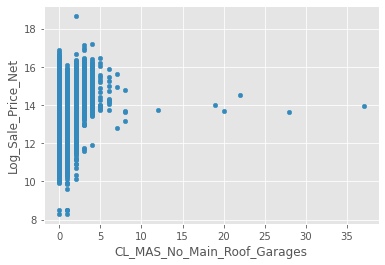

In [397]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_MAS_No_Main_Roof_Garages']], axis=1)
data.plot.scatter(x='CL_MAS_No_Main_Roof_Garages', y='Log_Sale_Price_Net')

In [398]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_MAS_No_Main_Roof_Garages'] > 6].index)

<AxesSubplot:xlabel='CL_MAS_No_Main_Roof_Garages', ylabel='Log_Sale_Price_Net'>

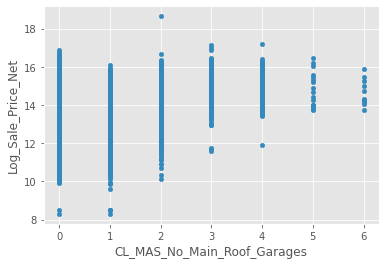

In [399]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_MAS_No_Main_Roof_Garages']], axis=1)
data.plot.scatter(x='CL_MAS_No_Main_Roof_Garages', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Building_Floor_Area', ylabel='Log_Sale_Price_Net'>

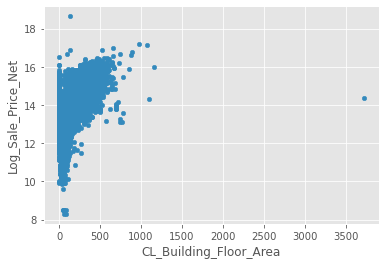

In [400]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Floor_Area']], axis=1)
data.plot.scatter(x='CL_Building_Floor_Area', y='Log_Sale_Price_Net')

In [401]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Floor_Area'] > 700].index)

<AxesSubplot:xlabel='CL_Building_Floor_Area', ylabel='Log_Sale_Price_Net'>

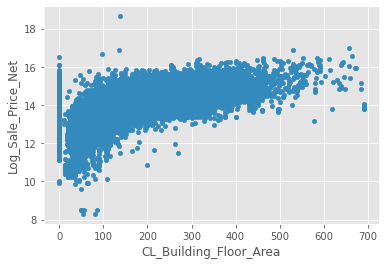

In [402]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Building_Floor_Area']], axis=1)
data.plot.scatter(x='CL_Building_Floor_Area', y='Log_Sale_Price_Net')

<AxesSubplot:xlabel='CL_Bedrooms', ylabel='Log_Sale_Price_Net'>

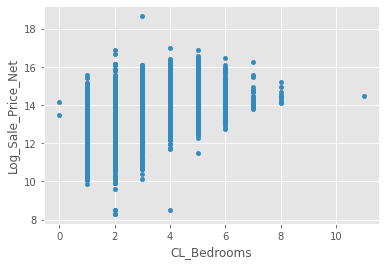

In [403]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Bedrooms']], axis=1)
data.plot.scatter(x='CL_Bedrooms', y='Log_Sale_Price_Net')

In [404]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Bedrooms'] > 9].index)

<AxesSubplot:xlabel='CL_Bedrooms', ylabel='Log_Sale_Price_Net'>

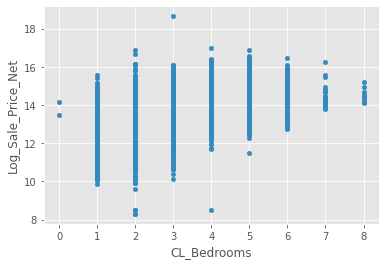

In [405]:
data = pd.concat([AKL_df['Log_Sale_Price_Net'],AKL_df['CL_Bedrooms']], axis=1)
data.plot.scatter(x='CL_Bedrooms', y='Log_Sale_Price_Net')

In [406]:
AKL_df = AKL_df.assign(school_count = AKL_df.loc[:, 'CL_School_Zone_1':'CL_School_Zone_5'].notna().sum(axis =1))
print(AKL_df.head())

       CL_QPID    CL_Suburb CL_Sale_Tenure CL_Sale_Date  CL_Sale_Price_Net  \
64617    75738    Wellsford              F   2021-11-05           687000.0   
64655    75814       Tapora              F   2021-03-12           792000.0   
64658    75835       Tapora              F   2019-06-04           414000.0   
64667    75842       Tapora              F   2018-09-12           305000.0   
64695    76103  Port Albert              F   2021-05-01           707000.0   

       CL_Land_Valuation_Capital_Value CL_Current_Revision_Date  \
64617                         550000.0               2017-07-01   
64655                         490000.0               2017-07-01   
64658                         400000.0               2017-07-01   
64667                         260000.0               2017-07-01   
64695                         510000.0               2017-07-01   

       CL_Building_Floor_Area  CL_Building_Site_Cover  CL_Land_Area  \
64617                   150.0                   100.0    

In [407]:
AKL_df = AKL_df.drop(['CL_School_Zone_1','CL_School_Zone_2','CL_School_Zone_3','CL_School_Zone_4','CL_School_Zone_5'], axis = 1)

In [408]:
AKL_df = AKL_df.drop(['CL_Current_Revision_Date','CL_Sale_Price_Net','CL_Val_Ref'], axis = 1)

In [409]:
AKL_df.isnull().sum()

CL_QPID                                0
CL_Suburb                           9037
CL_Sale_Tenure                         0
CL_Sale_Date                           0
CL_Land_Valuation_Capital_Value        0
CL_Building_Floor_Area              3192
CL_Building_Site_Cover              3301
CL_Land_Area                           6
CL_Bldg_Const                       7899
CL_Bldg_Cond                        7780
CL_Roof_Const                       7783
CL_Roof_Cond                        7780
CL_Category                            0
CL_LUD_Age                         10130
CL_LUD_Land_Use_Description            0
CL_MAS_No_Main_Roof_Garages         1381
CL_Latitude                        13286
CL_Longitude                       13286
CL_Bedrooms                         4643
CL_Bathrooms                           4
Log_Sale_Price_Net                     0
school_count                           0
dtype: int64

<AxesSubplot:>

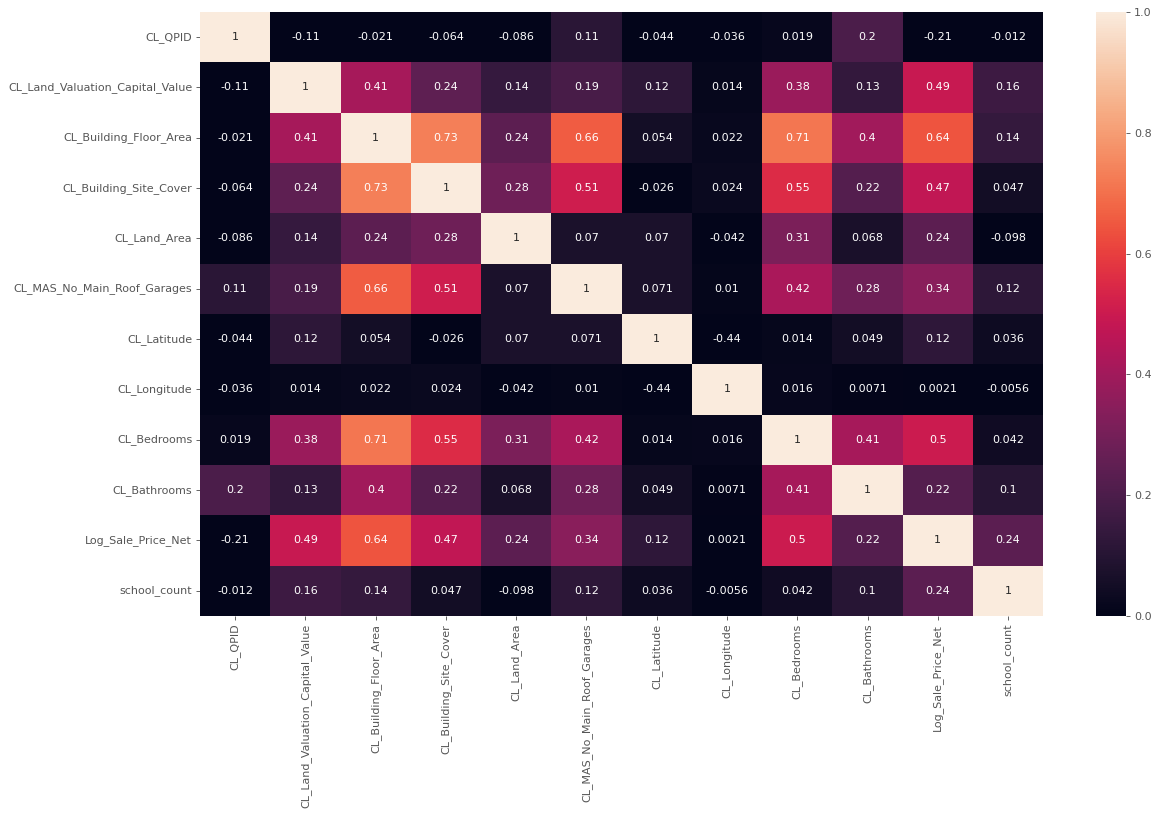

In [410]:
fig = plt.figure(figsize = (17,10), dpi = 80)
sns.heatmap(AKL_df.corr(), annot = True, vmin = 0, vmax = 1)

In [411]:
# remove category suffix
for i, row in AKL_df.iterrows():
    category = AKL_df['CL_Category'].loc[i][:2]
    AKL_df.at[i, 'CL_Category'] = category

AKL_df = AKL_df.drop(AKL_df[(AKL_df['CL_Category'] != 'RD') & (AKL_df['CL_Category'] != 'RA')].index)

In [412]:
AKL_df['CL_Building_Site_Cover'] = AKL_df['CL_Building_Site_Cover'].fillna(0)
AKL_df['CL_MAS_No_Main_Roof_Garages'] = AKL_df['CL_MAS_No_Main_Roof_Garages'].fillna(0)

AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Building_Floor_Area'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Suburb'].isnull()].index)

In [413]:
for col in ('CL_Bldg_Const', 'CL_Roof_Const', 'CL_Bldg_Cond', 'CL_Roof_Cond'):
    AKL_df[col] = AKL_df[col].fillna('None')

In [414]:
AKL_df.isnull().sum()

CL_QPID                               0
CL_Suburb                             0
CL_Sale_Tenure                        0
CL_Sale_Date                          0
CL_Land_Valuation_Capital_Value       0
CL_Building_Floor_Area                0
CL_Building_Site_Cover                0
CL_Land_Area                          1
CL_Bldg_Const                         0
CL_Bldg_Cond                          0
CL_Roof_Const                         0
CL_Roof_Cond                          0
CL_Category                           0
CL_LUD_Age                         1669
CL_LUD_Land_Use_Description           0
CL_MAS_No_Main_Roof_Garages           0
CL_Latitude                        4287
CL_Longitude                       4287
CL_Bedrooms                         522
CL_Bathrooms                          1
Log_Sale_Price_Net                    0
school_count                          0
dtype: int64

In [415]:
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Valuation_Capital_Value'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Latitude'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Longitude'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['CL_Land_Area'].isnull()].index)
AKL_df = AKL_df.drop(AKL_df[AKL_df['Log_Sale_Price_Net'].isnull()].index)
AKL_df.isnull().sum()

CL_QPID                              0
CL_Suburb                            0
CL_Sale_Tenure                       0
CL_Sale_Date                         0
CL_Land_Valuation_Capital_Value      0
CL_Building_Floor_Area               0
CL_Building_Site_Cover               0
CL_Land_Area                         0
CL_Bldg_Const                        0
CL_Bldg_Cond                         0
CL_Roof_Const                        0
CL_Roof_Cond                         0
CL_Category                          0
CL_LUD_Age                         578
CL_LUD_Land_Use_Description          0
CL_MAS_No_Main_Roof_Garages          0
CL_Latitude                          0
CL_Longitude                         0
CL_Bedrooms                        492
CL_Bathrooms                         1
Log_Sale_Price_Net                   0
school_count                         0
dtype: int64

In [416]:
AKL_df['CL_Bathrooms'] = AKL_df['CL_Bathrooms'].fillna(0)
AKL_df=AKL_df.drop(AKL_df[AKL_df['CL_LUD_Land_Use_Description'].isnull()].index)
AKL_df['CL_LUD_Age'] = AKL_df['CL_LUD_Age'].fillna('None')
AKL_df.isnull().sum()

CL_QPID                              0
CL_Suburb                            0
CL_Sale_Tenure                       0
CL_Sale_Date                         0
CL_Land_Valuation_Capital_Value      0
CL_Building_Floor_Area               0
CL_Building_Site_Cover               0
CL_Land_Area                         0
CL_Bldg_Const                        0
CL_Bldg_Cond                         0
CL_Roof_Const                        0
CL_Roof_Cond                         0
CL_Category                          0
CL_LUD_Age                           0
CL_LUD_Land_Use_Description          0
CL_MAS_No_Main_Roof_Garages          0
CL_Latitude                          0
CL_Longitude                         0
CL_Bedrooms                        492
CL_Bathrooms                         0
Log_Sale_Price_Net                   0
school_count                         0
dtype: int64

In [417]:
AKL_df=AKL_df.drop(AKL_df[AKL_df['CL_Bedrooms'].isnull()].index)
AKL_df.isnull().sum()

CL_QPID                            0
CL_Suburb                          0
CL_Sale_Tenure                     0
CL_Sale_Date                       0
CL_Land_Valuation_Capital_Value    0
CL_Building_Floor_Area             0
CL_Building_Site_Cover             0
CL_Land_Area                       0
CL_Bldg_Const                      0
CL_Bldg_Cond                       0
CL_Roof_Const                      0
CL_Roof_Cond                       0
CL_Category                        0
CL_LUD_Age                         0
CL_LUD_Land_Use_Description        0
CL_MAS_No_Main_Roof_Garages        0
CL_Latitude                        0
CL_Longitude                       0
CL_Bedrooms                        0
CL_Bathrooms                       0
Log_Sale_Price_Net                 0
school_count                       0
dtype: int64

In [418]:
print(AKL_df.head(10))

       CL_QPID    CL_Suburb CL_Sale_Tenure CL_Sale_Date  \
64617    75738    Wellsford              F   2021-11-05   
64655    75814       Tapora              F   2021-03-12   
64658    75835       Tapora              F   2019-06-04   
64667    75842       Tapora              F   2018-09-12   
64695    76103  Port Albert              F   2021-05-01   
64724    76139    Wellsford              F   2018-04-27   
64726    76170  Port Albert              F   2018-01-23   
64775    76360    Wellsford              F   2020-09-18   
64806    76402      Te Hana              F   2021-04-18   
64841    76409      Te Hana              F   2020-05-19   

       CL_Land_Valuation_Capital_Value  CL_Building_Floor_Area  \
64617                         550000.0                   150.0   
64655                         490000.0                    63.0   
64658                         400000.0                   350.0   
64667                         260000.0                    63.0   
64695               

In [419]:
for i, row in AKL_df.iterrows():
    sale_date = AKL_df['CL_Sale_Date'].loc[i]
    rfind_s = sale_date.rfind('-')
    date = sale_date[:rfind_s].replace('-', '')
    AKL_df.at[i, 'CL_Sale_Date'] = date

# Encode string column

In [420]:
object_cols = AKL_df.columns[AKL_df.dtypes == 'object']

for col in object_cols:
    encoder = LabelEncoder()
    encoder.fit(list(AKL_df[col].values))
    AKL_df[col] = encoder.transform(list(AKL_df[col].values))
print(AKL_df[object_cols])

         CL_Suburb  CL_Sale_Tenure  CL_Sale_Date  CL_Bldg_Const  CL_Bldg_Cond  \
64617          256               0            46              2             2   
64655          223               0            38              3             0   
64658          223               0            17             13             0   
64667          223               0             8             13             0   
64695          181               0            40              3             2   
...            ...             ...           ...            ...           ...   
3218018          9               0             7              2             2   
3218019          9               0             6              2             2   
3218095        198               0            19             13             2   
3218096        165               0            25              1             2   
3218097        165               0            25              1             2   

         CL_Roof_Const  CL_

# Numeric Column Preprocess

In [421]:
numeric_cols = ['CL_Land_Valuation_Capital_Value', 'CL_Building_Floor_Area',
       'CL_Building_Site_Cover', 'CL_Land_Area', 'CL_MAS_No_Main_Roof_Garages',
       'CL_Bedrooms', 'CL_Bathrooms']
print(numeric_cols)

['CL_Land_Valuation_Capital_Value', 'CL_Building_Floor_Area', 'CL_Building_Site_Cover', 'CL_Land_Area', 'CL_MAS_No_Main_Roof_Garages', 'CL_Bedrooms', 'CL_Bathrooms']


In [422]:
numeric_col_means = AKL_df.loc[:, numeric_cols].mean()
numeric_col_std = AKL_df.loc[:, numeric_cols].std()
AKL_df.loc[:, numeric_cols] = (AKL_df.loc[:, numeric_cols] - numeric_col_means) /numeric_col_std

In [423]:
sc = StandardScaler()
AKL_df.loc[:, numeric_cols] = sc.fit_transform(AKL_df.loc[:, numeric_cols])

In [424]:
print(AKL_df.head(10))

       CL_QPID  CL_Suburb  CL_Sale_Tenure  CL_Sale_Date  \
64617    75738        256               0            46   
64655    75814        223               0            38   
64658    75835        223               0            17   
64667    75842        223               0             8   
64695    76103        181               0            40   
64724    76139        256               0             3   
64726    76170        181               0             0   
64775    76360        256               0            32   
64806    76402        229               0            39   
64841    76409        229               0            28   

       CL_Land_Valuation_Capital_Value  CL_Building_Floor_Area  \
64617                        -0.776857               -0.084574   
64655                        -0.865695               -1.225402   
64658                        -0.998952                2.538018   
64667                        -1.206240               -1.225402   
64695               

In [425]:
AKL_df.to_csv("./outputs/cleaned_property_data.csv")